In [3]:
import pandas as pd
from pathlib import Path
from PIL import Image ,ExifTags
base_dir =  Path("/rds/general/user/ao921/home/eval_datasets")



In [39]:
from pathlib import Path
from typing import Any, Iterator
from PIL import Image

class ImageDataset():
  def __init__(self, image_dir: Path, label_file:Path) -> None:
    self.image_dir = image_dir
    self.labels = pd.read_csv(label_file)
#     self.image_paths = [path for path in image_dir.iterdir() if path.is_file()]

  def __len__(self) -> int:
    return len(self.labels)

  def __iter__(self) -> Iterator[Image.Image]:
    for row in self.labels.itertuples(index=False):
      yield self.load_image(row)

  def load_image(self, row ) -> Image.Image:
    return {
        "image" : Image.open(self.image_dir / row["IMG_ID"]),
        "lat": row["LAT"],
        "lon": row["LON"]
    }

  def __getitem__(self, item):
    return self.load_image(self.labels.iloc[item]) 

    


In [43]:
image_dataset = ImageDataset(base_dir/ "im2gps3ktest", base_dir / "im2gps3ktest.csv")


In [44]:
image_dataset[1]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>,
 'lat': 32.325436,
 'lon': -64.764404}

In [24]:
# img_exif = image_dataset[0].getexif()
# for key, val in img_exif.items():
#     if key in ExifTags.TAGS:
#         print(f'{ExifTags.TAGS[key]}:{val}')
#     else:
#         print(f'{key}:{val}')

In [21]:
# for key, val in img_exif.items():
#     print(key , ":", value)

In [22]:
# print("foo")

foo


In [42]:
column_names = [
    "unused",
    "IMG_ID",
    "secret",
    "server",
    "title",
    "timestamp",
    "latitude1",
    "camera",
    "tags",
    "description",
    "is_public",
    "is_friend",
        "LON",

    "LAT",
        "is_family",

    "place_url",

   
    "image_url",
    "license",
    "license_url",
    "server_id",
    "farm",
    "hash",
    "original_secret",
    "file_extension",
         "accuracy",

]

df = pd.read_csv(base_dir /"yfcc4k.txt", sep="\t",header=None, names=column_names)
df['file_extension'] = '.' + df['file_extension']
df['IMG_ID'] = df['IMG_ID'].astype(str) + df['file_extension']
df = df[["IMG_ID", "LAT", "LON"]]

In [43]:
import folium
sample = 1000
import folium.plugins as plugins
from folium.plugins import HeatMap

map_center=[df['LAT'][sample], df['LON'][sample]]
mymap = folium.Map(location=map_center, zoom_start=18)


# Add points to the map
count = 10
# for index, row in df.sample(n=count).iterrows():
folium.Marker([df['LAT'][sample],df['LON'][sample]]).add_to(mymap)




tile = folium.TileLayer(
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      name = 'Esri Satellite',
      overlay = False,
      control = True
      ).add_to(mymap)
folium.LayerControl().add_to(mymap)  
mymap

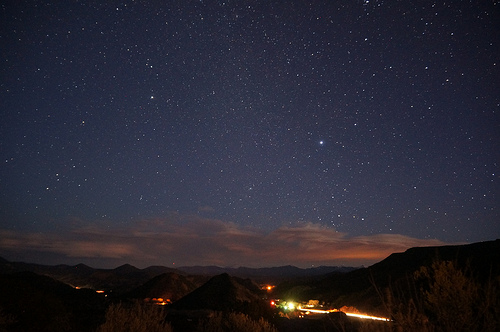

In [44]:

Image.open(base_dir / f"yfcc4k/{df['IMG_ID'][sample]}")

In [45]:
df[13]

KeyError: 13

In [46]:
df.to_csv('yfcc4k.csv', index=False) 

In [61]:
df[1]

0       10201275523
1        7289030198
2        4572998878
3        2764520341
4        4224177264
           ...     
4531     7121572837
4532    11894574114
4533     3856151314
4534     1254546625
4535     3247511947
Name: 1, Length: 4536, dtype: int64

In [71]:
# new_df = df.rename(columns={'A': 'X'})
for i in range(25):
    print(i, df[i].any()== "10003206806.jpg")

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False


0       10201275523
1        7289030198
2        4572998878
3        2764520341
4        4224177264
           ...     
4531     7121572837
4532    11894574114
4533     3856151314
4534     1254546625
4535     3247511947
Name: 1, Length: 4536, dtype: int64

In [72]:
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

2024-05-04 19:46:55.122335: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-04 19:46:55.122428: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-04 19:46:55.122450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-04 19:46:55.516497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: cannot import name 'cast' from partially initialized module 'keras.src.backend' (most likely due to a circular import) (/rds/general/user/ao921/home/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/keras/src/backend/__init__.py)

In [ ]:
doc = DocumentFile.from_images(['../mappilary/train_val/london/database/images/_TPTTeDgH5f_l5bz-ZK-wA.jpg'])
# predictor = ocr_predictor(pretrained=True)
model = ocr_predictor('linknet_resnet18', pretrained=True, assume_straight_pages=False, preserve_aspect_ratio=True)

result = predictor(doc)
synthetic_pages = result.synthesize()
plt.figure(figsize=(15,15))

plt.imshow(synthetic_pages[0])
plt.imshow(img, alpha=0.1)
print(result)

In [73]:
df.iloc[0]

0                                                     1
1                                           10201275523
2                       6ae91cc04fe06697c9404a5360b9b62
3                                          55289779@N00
4                                            booledozer
5                                 2013-10-09 15:30:13.0
6                                            1381464628
7                                    Panasonic+DMC-ZS10
8     Images+from+the+intersection+of+Parliament+and...
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                           -79.365637
13                                            43.649708
14                                                   16
15    http://www.flickr.com/photos/55289779@N00/1020...
16    http://farm6.staticflickr.com/5465/10201275523...
17                       Attribution-ShareAlike 

In [75]:
df[2]

0        6ae91cc04fe06697c9404a5360b9b62
1          b545e6a773632e2e65e6ecf1bf385
2        cefea4e4b5c2e2dfde9dd4312eebef5
3        a22b94f8654e46b225c1a4a366efe9d
4        a535d410aa7c45abe7112623394d0f1
                      ...               
4531    c7715e70c2de89cc3e9f5fcf4b12145d
4532      44e70be73bf8b7cdf5ec6f40165529
4533     555ae474e4a6ea044e36a3ce24ffcda
4534     f0ecc49caeef81e73e6b838dc2729dc
4535    732dc4eb20a7e71418aaa7e125e0ba73
Name: 2, Length: 4536, dtype: object

In [74]:
from torch.utils.data import IterableDataset
from pathlib import Path
from typing import Iterator, Dict, Any
from PIL import Image

class ImageDataset(IterableDataset):
  def __init__(self, image_dir: Path, label_file: Path) -> None:
    self.image_dir = image_dir
    self.labels = pd.read_csv(label_file)

  def __iter__(self) -> Iterator[Dict[str, Any]]:
    worker_info = torch.utils.data.get_worker_info()
    if worker_info is None:
      # Single-process loading, iterate through all labels
      for row in self.labels.itertuples():
        yield self.load_image(row)
    else:
      # Multi-process loading, split workload across workers
      per_worker = int(math.ceil(len(self.labels) / float(worker_info.num_workers)))
      worker_id = worker_info.id
      start = worker_id * per_worker
      end = min(start + per_worker, len(self.labels))
      for row in self.labels.iloc[start:end].itertuples():
        yield self.load_image(row)

  def load_image(self, row) -> Dict[str, Any]:
    return {
      "image": Image.open(self.image_dir / row.IMG_ID),
      "id": row.IMG_ID,
      "path": self.image_dir / row.IMG_ID,
      "lat": row.LAT,
      "lon": row.LON
    }


In [ ]:

from transformers import AutoTokenizer, BertModel




class BertMNLIFinetuner(LightningModule):
    def __init__(self):
        super().__init__()
        self.bertTokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
        self.bert = BertModel.from_pretrained("bert-base-cased", output_attentions=True)
        self.W = nn.Linear(bert.config.hidden_size, 3)
        self.num_classes = 3

    def forward(self, input_ids, attention_mask, token_type_ids):
        h, _, attn = self.bert(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        h_cls = h[:, 0]
        logits = self.W(h_cls)
        return logits, attn

In [52]:
import matplotlib.pyplot as plt


In [53]:
df = pd.read_json("~/notebooks/im2gps_small.jsonl", lines=True)
df.head()


,full,key,lines,lat,lon
0,"{'page_idx': 0, 'dimensions': [681, 1024], 'or...",104123223_7410c654ba_19_19355699@N00.jpg,[],-16.663606,145.563537
1,"{'page_idx': 0, 'dimensions': [760, 1024], 'or...",1095548455_f636d22cbb_1277_8576809@N08.jpg,"[ APTOVA, gne au, PIRANS Mm, 3 e 0]",31.893581,-85.141124
2,"{'page_idx': 0, 'dimensions': [683, 1024], 'or...",1185597181_0158ab4213_1311_43616936@N00.jpg,"[ HESS, 4 - dbrd), DONUIS, VAEVAE , Iktma ...",42.346571,-71.097228
3,"{'page_idx': 0, 'dimensions': [768, 1024], 'or...",1199004207_0ce4e7a456_1285_16418049@N00.jpg,[ 845],37.090924,25.370521
4,"{'page_idx': 0, 'dimensions': [768, 1024], 'or...",1257001714_3453f5fc4b_1405_11490799@N08.jpg,[],55.485759,28.791046


In [54]:
df['num_lines'] = df['lines'].apply(len)


In [55]:
df.head()

,full,key,lines,lat,lon,num_lines
0,"{'page_idx': 0, 'dimensions': [681, 1024], 'or...",104123223_7410c654ba_19_19355699@N00.jpg,[],-16.663606,145.563537,0
1,"{'page_idx': 0, 'dimensions': [760, 1024], 'or...",1095548455_f636d22cbb_1277_8576809@N08.jpg,"[ APTOVA, gne au, PIRANS Mm, 3 e 0]",31.893581,-85.141124,4
2,"{'page_idx': 0, 'dimensions': [683, 1024], 'or...",1185597181_0158ab4213_1311_43616936@N00.jpg,"[ HESS, 4 - dbrd), DONUIS, VAEVAE , Iktma ...",42.346571,-71.097228,6
3,"{'page_idx': 0, 'dimensions': [768, 1024], 'or...",1199004207_0ce4e7a456_1285_16418049@N00.jpg,[ 845],37.090924,25.370521,1
4,"{'page_idx': 0, 'dimensions': [768, 1024], 'or...",1257001714_3453f5fc4b_1405_11490799@N08.jpg,[],55.485759,28.791046,0


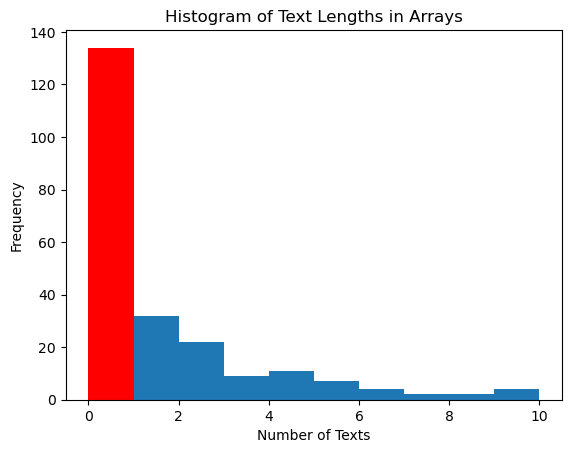

In [56]:
counts, bins, patches = plt.hist(df['num_lines'], bins=[0,1, 2, 3, 4,5,6,7,8,9,10,])
patches[0].set_facecolor('red')  
plt.xlabel('Number of Texts')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths in Arrays')
plt.show()

In [57]:
def display_results(key, df, locations):
    row = df.loc[key]
    map_center=[row['lat'] ,row['lon']]
    mymap = folium.Map(location=map_center, zoom_start=18)
    folium.Marker(
        location=map_center,
        tooltip="groundtruth",
        popup="Ground Truth",
        icon=folium.Icon(color="green"),
        ).add_to(mymap)

    for location in locations:
        if location is None:
            continue
        print(distance.distance((row['lat'] ,row['lon']), (location.latitude,location.longitude)).km)
        folium.Marker(location=[location.latitude,location.longitude],
                    popup=location.address).add_to(mymap)




    tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
        ).add_to(mymap)
    folium.LayerControl().add_to(mymap)  
    return mymap

1185597181_0158ab4213_1311_43616936@N00.jpg
[' HESS', ' 4 - dbrd)', ' DONUIS', ' VAEVAE ', ' Iktma ADIV', ' 99']


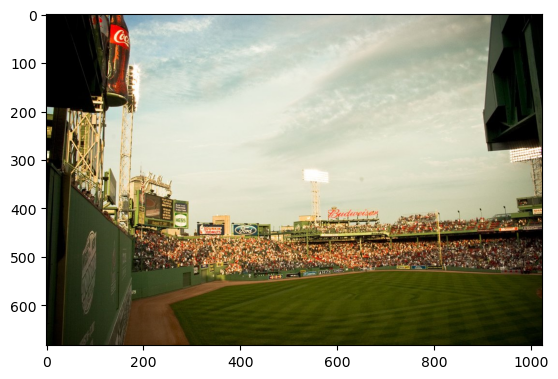

Hess, Alva, Woods County, Oklahoma, United States
Dubarid, كتم, ولاية شمال دارفور, السودان
None
Te Waewae Bay, Southland, New Zealand / Aotearoa
None
Lions Gate Bridge, Park Royal, West Vancouver, Metro Vancouver Regional District, British Columbia, V7P, Canada


In [66]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Imperial College London")
key = df.iloc[2]["key"]
from geopy import distance

img = Image.open(base_dir/f"im2gps_small/{key}")
print(key)
print( df.iloc[2]['lines'])
plt.imshow(img)
plt.show()
locations = [ geolocator.geocode(text) for text in df.iloc[2]['lines'] if text is not None]
for location in locations:
    print(location)

In [67]:
display_results(1, df, locations)

1357.5187356936408
10840.279921866017
13758.810640878724
3696.288877905194


In [68]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class ImageTextDataset(Dataset):
    def __init__(self, image_folder, annotation_file, tokenize, transform=None):
        self.image_folder = image_folder
        self.annotations = self.load_annotations(annotation_file)
        self.transform = transform
        self.tokenize = tokenize

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name, annotation = self.annotations[idx]
        annotation = self.tokenize(annotation)
        img_path = os.path.join(self.image_folder, img_name)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, annotation

    def load_annotations(self, annotation_file):
        with open(annotation_file, "r") as f:
            lines = f.readlines()
        annotations = [line.strip().split(", ") for line in lines]
        return annotations

ImportError: cannot import name 'get_ctx' from 'torch.library' (/rds/general/user/ao921/home/anaconda3/envs/pytorch_env/lib/python3.11/site-packages/torch/library.py)